# <font color="#1d479b">DCGAN</font>

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import argparse
import time
import pickle
from PIL import Image
from folder import ImageFolder # pour import placer le fichier dans le répertoire 
#./20200918_DCGAN/GAN/

import torch
import torch.nn as nn
import torch.nn.init as init
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torchvision.transforms import ToPILImage

from torchnet.meter import AverageValueMeter

In [14]:
! pip install folder

Defaulting to user installation because normal site-packages is not writeable
  Using cached folder-0.0.1-py3-none-any.whl (3.2 kB)


In [33]:
! pip install torchvision==0.8.2 # version compatible avec torch==1.7.1

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.7 MB 9.1 MB/s            
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1
    Uninstalling torchvision-0.11.1:
      Successfully uninstalled torchvision-0.11.1


In [ ]:
# avant 
torch                             1.7.1
torchfile                         0.1.0
torchnet                          0.0.4
torchvision                       0.11.1

In [111]:
path = r'/home/catherinele/Documents/TRAVAIL/COMPUTER_SCIENCE/NEW/PROJET7_DEVELOPPER_UNE_PREUVE_DE_CONCEPT/20200918_DCGAN/GAN/ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes'
path

'/home/catherinele/Documents/TRAVAIL/COMPUTER_SCIENCE/NEW/PROJET7_DEVELOPPER_UNE_PREUVE_DE_CONCEPT/20200918_DCGAN/GAN/ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes'

In [112]:
arr = os.listdir(path)
arr

['La Sportiva',
 'Superga Kids',
 'Armani Jeans',
 'Osiris Kids',
 'Salvatore Ferragamo',
 'Giro',
 'Generic Surplus',
 'Rieker',
 'Jumping Jacks Kids',
 'Orthaheel',
 'HUGO',
 'Dexter Bowling',
 'Dr. Martens',
 'Converse Kids',
 'Pearl Izumi',
 'Speedo',
 'Axion',
 'Fallen',
 'Umi Kids',
 'adidas Originals Kids',
 'Calvin Klein',
 'UGG Kids',
 'Bikkembergs',
 'Cienta Kids Shoes',
 'Salomon',
 'Prince',
 'Nike Golf',
 'MOZO',
 'Hoka One One',
 'Geox Kids',
 'Chicago Skates',
 'Diadora',
 'PUMA',
 'Vibram FiveFingers',
 'Montrail',
 'adidas Y-3 by Yohji Yamamoto',
 'Quiksilver',
 'Twig Kids',
 'Romika',
 'Calvin Klein Jeans',
 'adidas by Stella McCartney',
 'Original Penguin',
 'Alexander McQueen',
 'Merrell Kids',
 'Marc Jacobs',
 'Zigi',
 'ASICS',
 'Stuart Weitzman for The Cool People',
 'etnies',
 'SIDI',
 'MIA',
 'SLVR',
 'Bloch',
 'See Kai Run Kids',
 'Garmont',
 'Jambu',
 'Vans',
 'Polo Ralph Lauren Kids',
 'Nike Action',
 'Supra',
 'Rocket Dog',
 'Costume National',
 'Converse by

In [113]:
import os

arr = os.listdir(path)
dictionary={}
for folder_name in arr:

    path = r'/home/catherinele/Documents/TRAVAIL/COMPUTER_SCIENCE/NEW/PROJET7_DEVELOPPER_UNE_PREUVE_DE_CONCEPT/20200918_DCGAN/GAN/ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes/{}'.format(folder_name)

    liste = os.listdir(path) # dir is your directory path
    number_files = len(liste)
    #print ("{} files count: ".format(folder_name), number_files)
    dictionary[folder_name] = number_files

dictionary

{'La Sportiva': 20,
 'Superga Kids': 33,
 'Armani Jeans': 5,
 'Osiris Kids': 15,
 'Salvatore Ferragamo': 7,
 'Giro': 21,
 'Generic Surplus': 2,
 'Rieker': 9,
 'Jumping Jacks Kids': 16,
 'Orthaheel': 13,
 'HUGO': 2,
 'Dexter Bowling': 4,
 'Dr. Martens': 3,
 'Converse Kids': 98,
 'Pearl Izumi': 25,
 'Speedo': 26,
 'Axion': 8,
 'Fallen': 41,
 'Umi Kids': 10,
 'adidas Originals Kids': 133,
 'Calvin Klein': 4,
 'UGG Kids': 7,
 'Bikkembergs': 33,
 'Cienta Kids Shoes': 9,
 'Salomon': 94,
 'Prince': 23,
 'Nike Golf': 50,
 'MOZO': 1,
 'Hoka One One': 12,
 'Geox Kids': 76,
 'Chicago Skates': 8,
 'Diadora': 28,
 'PUMA': 576,
 'Vibram FiveFingers': 19,
 'Montrail': 36,
 'adidas Y-3 by Yohji Yamamoto': 25,
 'Quiksilver': 12,
 'Twig Kids': 14,
 'Romika': 4,
 'Calvin Klein Jeans': 4,
 'adidas by Stella McCartney': 10,
 'Original Penguin': 15,
 'Alexander McQueen': 4,
 'Merrell Kids': 33,
 'Marc Jacobs': 5,
 'Zigi': 18,
 'ASICS': 349,
 'Stuart Weitzman for The Cool People': 1,
 'etnies': 70,
 'SIDI': 

In [128]:
import pandas as pd

df = pd.DataFrame.from_dict(dictionary, orient='index').sort_values(by=0, ascending=False)
df = df.reset_index()
df = df.rename(columns={0: "counts", "index": "brands"})
print(df.shape)
df =df.iloc[0:49:,]
df.head()

(336, 2)


brands  counts
0         Nike     834
1         PUMA     576
2  New Balance     426
3     SKECHERS     393
4    Nike Kids     367

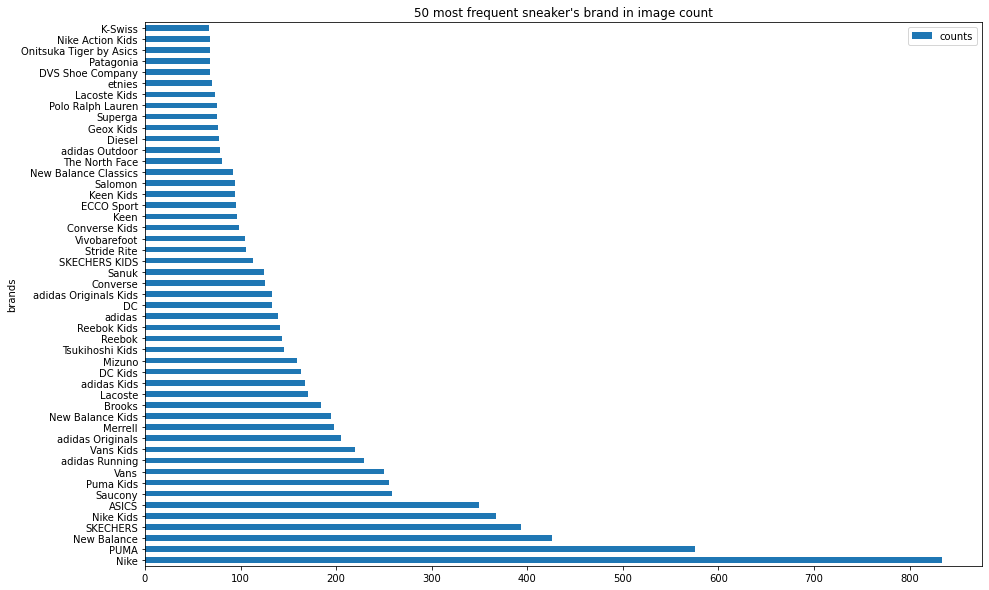

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)

ax = df[0:100].plot.barh(x='brands', y="counts")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("50 most frequent sneaker's brand in image count")
plt.show()

## <font color="#337da4">The Best DCGAN Model</font>

**Parmi les modèles testés selon les différentes valeurs des hyperparamètres, nous en selectionnons un afin de redimensionner son réseau pour agrandir les images en sortie passant de 64x64 à 128x128. Après analyses des graphiques ci-dessous, le modèle choisi est le DCGAN3. D'où l'apellation DCGAN3_Scaled. Ci-dessous, les étapes de raisonnement:** 

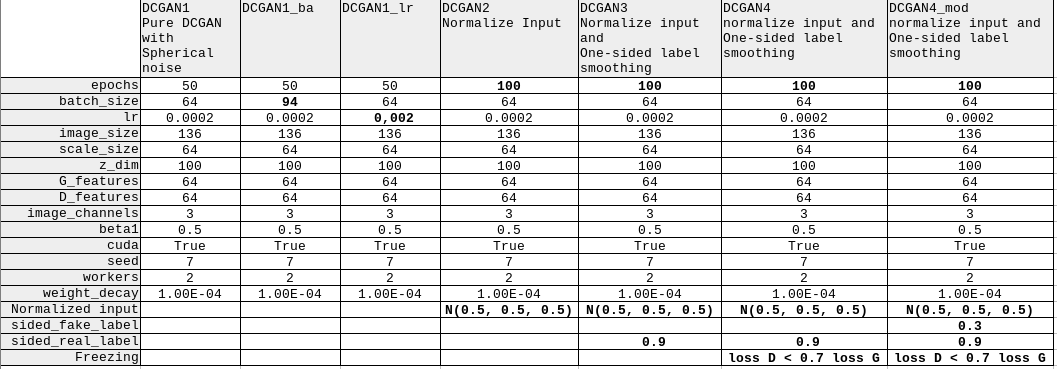

**Parmi ces modèles, on va déjà exclure les modèles DCGAN1, DCGAN1_ba, DCGAN1_lr car ils ont été lancé avec seulement 50 epochs, rendant les images générées opaques. Il reste alors le DCGAN2, DCGAN3, DCGAN4 et DCGAN4_mod. Regardons leurs résultats:**

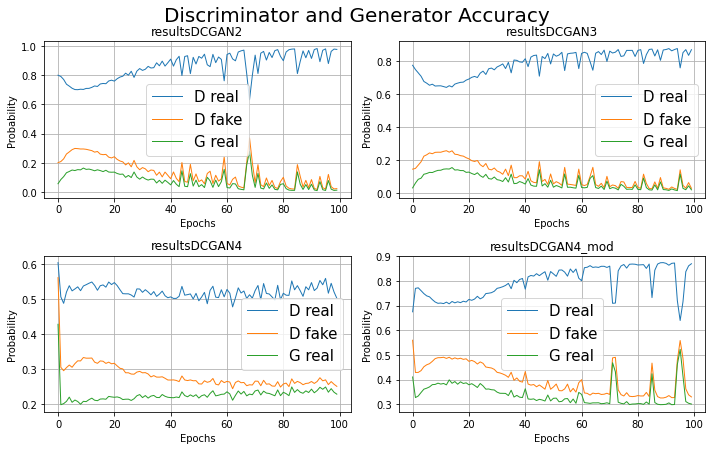

**Parmi les modèles DCGAN2, DCGAN3, DCGAN4, et DCGAN4_mod, on peut déjà exclure le DCGAN4 car l'Accuracy du Discriminateur pour les images réelles n'est que 50% environ. On exclue aussi le modèle DCGAN4_mod car ces résultats sont instables.  Il reste alors le DCGAN2 et DCGAN3. Regardons le graphique ci-dessous pour les departager:**

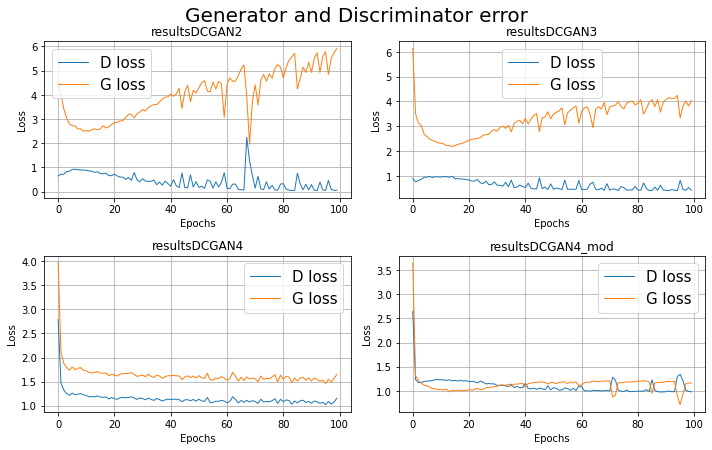

**On voit que l'erreur de prédiction du Générateur est plus élevée pour le DCGAN2 que pour le DCGAN3. Donc, on choisit le DCGAN3 pour le redimensionnement de son réseau afin d'obtenir de plus grandes images. On va donc passer de la dimension 64x64 à 128x128 en appliquant le DCGAN3.**

**Relançons le DCGAN3 avec son réseau modifié pour le Générateur et le Discriminateur == DCGAN3_Scaled:**

## <font color="#337da4">Define DCGAN3_Scaled's Arguments</font>

In [10]:
'''
data_path : Folder of sub folders
'''

parser = {
    'data_path': './ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes',
    'epochs': 50,
    'batch_size': 64,
    # We found the suggested learning rate of 0.001, to be too high, using 0.0002 instead.
    'lr': 0.0002,
    'image_size': 136,
    'scale_size': 128,
    'z_dim': 100,
    'G_features': 64,
    'D_features': 64,
    'image_channels': 3,
    # momentum term β1 at the suggested value of 0.9 resulted 
    # in training oscillation and instability while reducing it to 0.5 helped stabilize training
    'beta1': 0.5,
    'cuda': True,
    'seed': 7,
    'workers': 2,
    'results': './resultsDCGAN3_Scaled/'
}
args = argparse.Namespace(**parser)
args.image_results = args.results + 'images/'
args.loss_results = args.results + 'loss/'
args.cuda = args.cuda and torch.cuda.is_available()

# Make Sneakers_and_Athletic_Shoes_split Folder
if not os.path.isdir(args.data_path):
    os.makedirs(args.data_path)
    
# Mahe resultsDCGAN3_Scaled Folder    
if not os.path.isdir(args.results):
    os.makedirs(args.results)
    
# Make image folder    
if not os.path.isdir(args.image_results):
    os.makedirs(args.image_results)
    
# Make loss Folder   
if not os.path.isdir(args.loss_results):
    os.makedirs(args.loss_results)
    
torch.manual_seed(args.seed)
if args.cuda:
    torch.cuda.manual_seed(args.seed)

In [22]:
args.data_path

'./ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes'


## <font color="#337da4">Prepare Data</font>

In [20]:
from folder import ImageFolder

def get_loader(image_root, batch_size, scale_size, num_workers=2, shuffle=True):

    #image_root = os.path.join(root, 'splits', split)
    
    dataset = ImageFolder(
        root=image_root, 
        transform=transforms.Compose([
        
            transforms.Pad(34, fill=(255, 255, 255)), # padding images with (255,255,255) --> pad 255 in 3 channels
            transforms.CenterCrop((136,136)),
            transforms.Scale(scale_size),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # Modify here
    ]))

    data_loader = torch.utils.data.DataLoader(
        dataset, 
        batch_size=batch_size, 
        shuffle=shuffle, 
        num_workers=int(num_workers))
    
    #data_loader.shape = [int(num) for num in dataset[0][0].size()]

    return data_loader

dataloader = get_loader(args.data_path, args.batch_size, args.scale_size)

Found 12859 images in subfolders of: ./ut-zap50k-images-square/Shoes/Sneakers and Athletic Shoes


In [56]:
! pip install folder

Defaulting to user installation because normal site-packages is not writeable


In [21]:
test_image = 0

for data, _ in dataloader:
    print(data[0])
    test_image = data[0]
    break

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


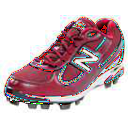

In [22]:
from torchvision.transforms import ToPILImage

to_image = ToPILImage()

to_image(test_image)


## <font color="#337da4">Define Model</font>

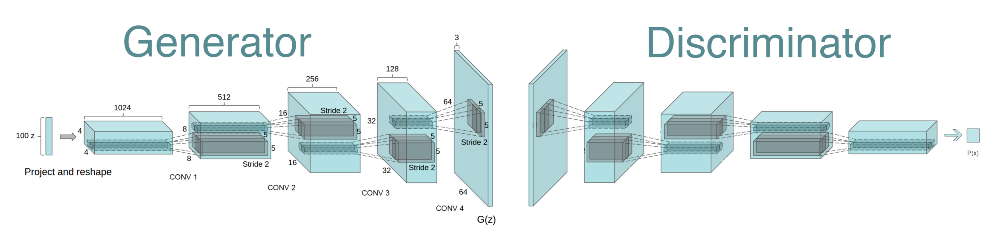

### Define G

In [6]:
'''
    'z_dim': 100,
    'G_features': 64,
    'D_features': 64,
    
  
torch.nn.ConvTranspose2d(
in_channels, 
out_channels, 
kernel_size, 
stride=1, 
padding=0, 
output_padding=0, 
groups=1, 
bias=True, 
dilation=1, 
padding_mode='zeros', 
device=None, 
dtype=None)  
    
    
    '''

class _netG(nn.Module):
    def __init__(self):
        super(_netG, self).__init__()
        self.main = nn.Sequential(
            
            # input is Z, going into a convolution
            nn.ConvTranspose2d(args.z_dim, 
                               args.G_features * 16,
                               4, 
                               1, 
                               0, 
                               bias=False),
            
            nn.BatchNorm2d(args.G_features * 16),
            nn.ReLU(True),
            
             # state size. (ngf*16) x 4 x 4
            nn.ConvTranspose2d(args.G_features * 16, 
                               args.G_features * 8,
                               4, 
                               2, 
                               1, 
                               bias=False),
            nn.BatchNorm2d(args.G_features * 8),
            nn.ReLU(True),
            
            # state size. (ngf*8) x 8 x 8
            nn.ConvTranspose2d(args.G_features * 8, 
                               args.G_features * 4,
                               4, 
                               2, 
                               1, 
                               bias=False),
            
            nn.BatchNorm2d(args.G_features * 4),
            nn.ReLU(True),
            
            # state size. (ngf*4) x 16 x 16 
            nn.ConvTranspose2d(args.G_features * 4, 
                               args.G_features * 2,
                               4, 
                               2, 
                               1, 
                               bias=False),
            nn.BatchNorm2d(args.G_features * 2),
            nn.ReLU(True),
            
            
            
             # state size. (ngf*2) x 32 x 32
            nn.ConvTranspose2d(args.G_features * 2, 
                               args.G_features * 1,
                               4, 
                               2, 
                               1, 
                               bias=False),
            nn.BatchNorm2d(args.G_features * 1),
            nn.ReLU(True),
             
            
            
            # state size. (ngf) x 64 x 64
            nn.ConvTranspose2d(args.G_features , 
                               args.image_channels,
                               4, 
                               2, 
                               1, 
                               bias=False),
            nn.Tanh()
           
            # state size. (nc) x 128 x 128
        )
        self._initialize_weights()
        
    # custom weight initialization
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.ConvTranspose2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                
                #All weights were initialized 
                #from a zero-centered Normal distribution 
                #with standard deviation 0.02
                init.normal(m.weight, mean=0, std=0.02)
                
            elif isinstance(m, nn.BatchNorm2d):
                init.normal(m.weight, mean=1, std=0.02)
                init.constant(m.bias, 0)

    def forward(self, x):
        return self.main(x)

### Define D

In [7]:
'''
    'z_dim': 100,
    'G_features': 64,
    'D_features': 64,

torch.nn.Conv2d(
in_channels, 
out_channels, 
kernel_size, : An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
stride=1, 
padding=0, 
dilation=1, 
groups=1, 
bias=True, 
padding_mode='zeros', 
device=None, 
dtype=None)
'''


class _netD(nn.Module):
    def __init__(self):
        super(_netD, self).__init__()
        
        self.main = nn.Sequential(
            
            # input is (nc) x 128 x 128
            nn.Conv2d(args.image_channels, 
                      args.D_features,
                      4, 
                      stride=2, 
                      padding=1, 
                      bias=False),
            
            #In the LeakyReLU, the slope of the leak was set to 0.2 in all models
            nn.LeakyReLU(0.2, inplace=True),
            
            # state size. (ndf) x 64 x 64
            nn.Conv2d(args.D_features, 
                      args.D_features * 2,
                      4, 
                      stride=2, 
                      padding=1, 
                      bias=False),
            nn.BatchNorm2d(args.D_features * 2),
            nn.LeakyReLU(0.2, inplace=True),
            
            # state size. (ndf*2) x 32 x 32
            nn.Conv2d(args.D_features * 2, 
                      args.D_features * 4,
                      4, 
                      stride=2,  
                      padding=1, 
                      bias=False),
            nn.BatchNorm2d(args.D_features * 4),
            nn.LeakyReLU(0.2, inplace=True),
            
            # state size. (ndf*4) x 16 x 16 
            nn.Conv2d(args.D_features * 4,
                      args.D_features * 8,
                      4, 
                      stride=2, 
                      padding=1, 
                      bias=False),
            nn.BatchNorm2d(args.D_features * 8),
            nn.LeakyReLU(0.2, inplace=True),
            
            
            # state size. (ndf*8) x 8 x 8
            nn.Conv2d(args.D_features * 8,
                      args.D_features * 16,
                      4, 
                      stride=2, 
                      padding=1, 
                      bias=False),
            nn.BatchNorm2d(args.D_features * 16),
            
            nn.LeakyReLU(0.2, inplace=True),
            
     
            # state size. (ndf*16) x 4 x 4
            nn.Conv2d(args.D_features * 16, 
                      1, 
                      4, 
                      stride=1,  
                      padding=0, 
                      bias=False),
            
            nn.Sigmoid()
            
            # state size. 1
        )
        self._initialize_weights()
        
    # custom weight initialization
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                #All weights were initialized 
                #from a zero-centered Normal distribution 
                #with standard deviation 0.02
                init.normal(m.weight, mean=0, std=0.02)
            elif isinstance(m, nn.BatchNorm2d):
                init.normal(m.weight, mean=1, std=0.02)
                init.constant(m.bias, 0)

    def forward(self, input):
        output = self.main(input)
        return output.view(-1, 1)


## <font color="#337da4">Define losses</font>

In [31]:
class Results():
    def __init__(self, results_path):
        self.D_losses = []
        self.G_losses = []
        self.D_reals = []
        self.D_fakes = []
        self.G_reals = []
        self.results_path = results_path
    
    def save_losses(self, D_loss, G_loss, D_real, D_fake, G_real):
        self.D_losses.append(D_loss)
        self.G_losses.append(G_loss)
        self.D_reals.append(D_real)
        self.D_fakes.append(D_fake)
        self.G_reals.append(G_real)
        
    def save_to_disk(self):
        f = open(self.results_path + "D_losses.pkl", "wb")
        pickle.dump(self.D_losses, f)
        f= open(self.results_path + "G_losses.pkl", "wb")
        pickle.dump(self.G_losses, f)
        f = open(self.results_path + "D_reals.pkl", "wb")
        pickle.dump(self.D_reals, f)
        f = open(self.results_path + "D_fakes.pkl", "wb")
        pickle.dump(self.D_fakes, f)
        f = open(self.results_path + "G_reals.pkl", "wb")
        pickle.dump(self.G_reals, f)
        


## <font color="#337da4">Define Train</font>

In [131]:
real_label = torch.from_numpy(np.full(64, 0.9, np.float32))
# (64,)
real_label

<built-in method size of Tensor object at 0x7f2dec6ddb00>


tensor([0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000, 0.9000,
        0.9000])

In [32]:
def train(args, data_loader, netG, netD, G_optimizer, D_optimizer,
          criterion, epoch, result_losses):
    D_losses = AverageValueMeter()
    G_losses = AverageValueMeter()
    D_reals = AverageValueMeter()
    D_fakes = AverageValueMeter()
    G_reals = AverageValueMeter()
    
    start = time.time()
    # call Variable after .cuda()
    for i, (real, _) in enumerate(data_loader):
        batch_size = real.size(0)
        real_label = torch.from_numpy(np.full(batch_size, 0.9, np.float32)) # modify here
        fake_label = torch.zeros(batch_size)
        z = torch.randn(batch_size, args.z_dim, 1, 1)
        
        if args.cuda:
            real_label = real_label.cuda()
            fake_label = fake_label.cuda()
            real = real.cuda()
            z = z.cuda()
        real_label = Variable(real_label)
        fake_label = Variable(fake_label)
        real = Variable(real)
        z = Variable(z)
        
        real_output = netD(real)
        real_label = real_label.unsqueeze(1)  #> real_label.shape : [64,] to [64, 1]
        D_real_loss = criterion(real_output, real_label)
        D_real = real_output.data.mean()
        
        fake = netG(z)
        fake_output = netD(fake.detach())
        fake_label = fake_label.unsqueeze(1) #> fake_label.shape :[64,] to [64, 1]
        D_fake_loss = criterion(fake_output, fake_label)
        D_fake = fake_output.data.mean()
        
        D_loss = D_real_loss + D_fake_loss
        netD.zero_grad()
        D_loss.backward()
        D_optimizer.step()
        
        output = netD(fake)
        G_loss = criterion(output, real_label)
        G_real = output.data.mean()
        netG.zero_grad()
        G_loss.backward()
        G_optimizer.step()
        
        D_losses.add(D_loss.data.cpu()* batch_size, batch_size)
        G_losses.add(G_loss.data.cpu() * batch_size, batch_size)
        D_reals.add(D_real.cpu() * batch_size, batch_size)
        D_fakes.add(D_fake.cpu() * batch_size, batch_size)
        G_reals.add(G_real.cpu() * batch_size, batch_size)
        
    print("=> EPOCH {} | Time: {}s | D_loss: {:.4f} | G_loss: {:.4f}"
          " | D_real: {:.4f} | D_fake: {:.4f} | G_real: {:.4f}"
          .format(epoch, round(time.time()-start), D_losses.value()[0],
                  G_losses.value()[0], D_reals.value()[0],
                  D_fakes.value()[0], G_reals.value()[0]))
    result_losses.save_losses(D_losses.value()[0],
                  G_losses.value()[0], D_reals.value()[0],
                  D_fakes.value()[0], G_reals.value()[0])

## <font color="#337da4">Define Generate</font>

In [8]:
def generate(args, netG, epoch):
    z = torch.randn(args.batch_size, args.z_dim, 1, 1)
    if args.cuda:
        z = z.cuda()
    fake = netG(Variable(z, volatile=True))
    save_image(fake.data.cpu(), os.path.join(args.image_results,
        "fake_sample_epoch_{:02d}.png".format(epoch)), normalize=True)


## <font color="#337da4">Create Model -  Define Loss and Optimizer</font>

In [11]:
# Create Model
netG = _netG()
netD = _netD()

# Define Loss
criterion = nn.BCELoss()

#
if args.cuda:
    netD.cuda()
    netG.cuda()
    criterion.cuda()
    
# optimizer    

D_optimizer = optim.Adam(netD.parameters(), lr=args.lr,
                         betas=(args.beta1, 0.999), weight_decay=1e-4)
G_optimizer = optim.Adam(netG.parameters(), lr=args.lr,
                         betas=(args.beta1, 0.999), weight_decay=1e-4)    
    

/tmp/ipykernel_19426/935160786.py:107: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight, mean=0, std=0.02)
/tmp/ipykernel_19426/935160786.py:110: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight, mean=1, std=0.02)
/tmp/ipykernel_19426/935160786.py:111: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)
/tmp/ipykernel_19426/2837698671.py:103: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight, mean=0, std=0.02)
/tmp/ipykernel_19426/2837698671.py:105: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight, mean=1, std=0.02)
/tmp/ipykernel_19426/2837698671.py:106: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


In [12]:
netG

_netG(
  (main): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): BatchNorm2

In [13]:
netD

_netD(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (12): BatchNorm2d(1024, eps=1e-05, moment


## <font color="#337da4">Run Train</font>

In [35]:
result_losses = Results(args.loss_results)

start_time= time.time()

for epoch in range(0, args.epochs):
    train(args, dataloader, netG, netD, G_optimizer, D_optimizer,
          criterion, epoch, result_losses)
    generate(args, netG, epoch)
    
execution_time = (time.time() - start_time)/60.0

=> EPOCH 0 | Time: 67s | D_loss: 5.2769 | G_loss: 21.1183 | D_real: 0.8056 | D_fake: 0.1528 | G_real: 0.0461


/tmp/ipykernel_6130/380818126.py:5: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  fake = netG(Variable(z, volatile=True))


=> EPOCH 1 | Time: 71s | D_loss: 1.1017 | G_loss: 3.0645 | D_real: 0.6671 | D_fake: 0.2346 | G_real: 0.1086
=> EPOCH 2 | Time: 73s | D_loss: 1.0913 | G_loss: 3.0458 | D_real: 0.6663 | D_fake: 0.2356 | G_real: 0.1104
=> EPOCH 3 | Time: 75s | D_loss: 1.0528 | G_loss: 2.9965 | D_real: 0.6613 | D_fake: 0.2360 | G_real: 0.1012
=> EPOCH 4 | Time: 76s | D_loss: 1.0604 | G_loss: 3.0490 | D_real: 0.6603 | D_fake: 0.2385 | G_real: 0.1035
=> EPOCH 5 | Time: 76s | D_loss: 1.1142 | G_loss: 2.7694 | D_real: 0.6345 | D_fake: 0.2650 | G_real: 0.1167
=> EPOCH 6 | Time: 76s | D_loss: 1.0827 | G_loss: 2.7171 | D_real: 0.6381 | D_fake: 0.2605 | G_real: 0.1128
=> EPOCH 7 | Time: 76s | D_loss: 1.0556 | G_loss: 2.8331 | D_real: 0.6468 | D_fake: 0.2538 | G_real: 0.1068
=> EPOCH 8 | Time: 76s | D_loss: 1.0436 | G_loss: 2.7967 | D_real: 0.6470 | D_fake: 0.2497 | G_real: 0.1145
=> EPOCH 9 | Time: 76s | D_loss: 1.0573 | G_loss: 2.6915 | D_real: 0.6411 | D_fake: 0.2581 | G_real: 0.1230
=> EPOCH 10 | Time: 76s | D_

In [36]:
execution_time

63.17036900917689

## <font color="#337da4">Results</font>

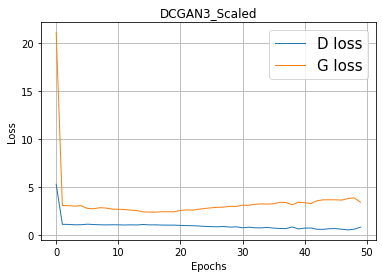

In [79]:
import pickle
import matplotlib.pyplot as plt

loss_path = '/home/catherinele/Documents/TRAVAIL/COMPUTER_SCIENCE/NEW/PROJET7_DEVELOPPER_UNE_PREUVE_DE_CONCEPT/20200918_DCGAN/GAN/resultsDCGAN3_Scaled/loss/'

with open(loss_path+ 'D_losses.pkl', "rb") as f:
    D_losses = pickle.load(f)
    
with open(loss_path+ 'G_losses.pkl', "rb") as f:
    G_losses = pickle.load(f)

with open(loss_path+ 'D_reals.pkl', "rb") as f:
    D_reals = pickle.load(f)

with open(loss_path+ 'D_fakes.pkl', "rb") as f:
    D_fakes = pickle.load(f)

with open(loss_path+ 'G_reals.pkl', "rb") as f:
    G_reals = pickle.load(f)

with open(loss_path+ 'G_reals.pkl', "rb") as f:
        G_reals = pickle.load(f)



plt.plot(D_losses, linewidth=1, label="D loss")
plt.plot(G_losses, linewidth=1, label="G loss")
plt.grid()
plt.legend(fontsize=15)
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("Loss", fontsize=10)
#plt.title('Generator and Discriminator error', fontsize=19)
plt.savefig(loss_path + 'GD_DCGAN3_Scaled.png')
plt.title("DCGAN3_Scaled")
plt.show()

**L'erreur de prédiction pour le Générateur et le Discriminateur est correct pour 50 epochs.**

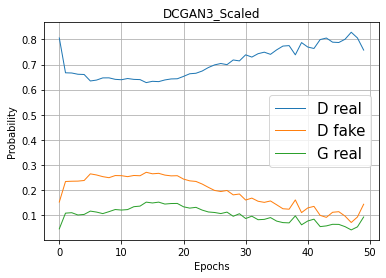

In [78]:
plt.plot(D_reals, linewidth=1, label="D real")
plt.plot(D_fakes, linewidth=1, label="D fake")
plt.plot(G_reals, linewidth=1, label="G real")

plt.grid()
plt.legend(fontsize=15)
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("Probability", fontsize=10)
#plt.title('Discriminator performace', fontsize=19)
plt.savefig(loss_path + 'D_DCGAN3_Scaled.png')
plt.title("DCGAN3_Scaled")
plt.show()

**Le Discriminateur s'améliore dans la détection des vraies images. Par contre il parvient moins bien à détecter les images générées. Cela veut dire que le Générateur s'ameliore à produire de fausses images très ressemblantes aux images réelles.** 

**L'Accuracy du Générateur suit le même mouvement que celui du Discrminateur car `G_real = netD(fake).data.mean()` correspondant au feedback du Discriminateur vers le Générateur.**

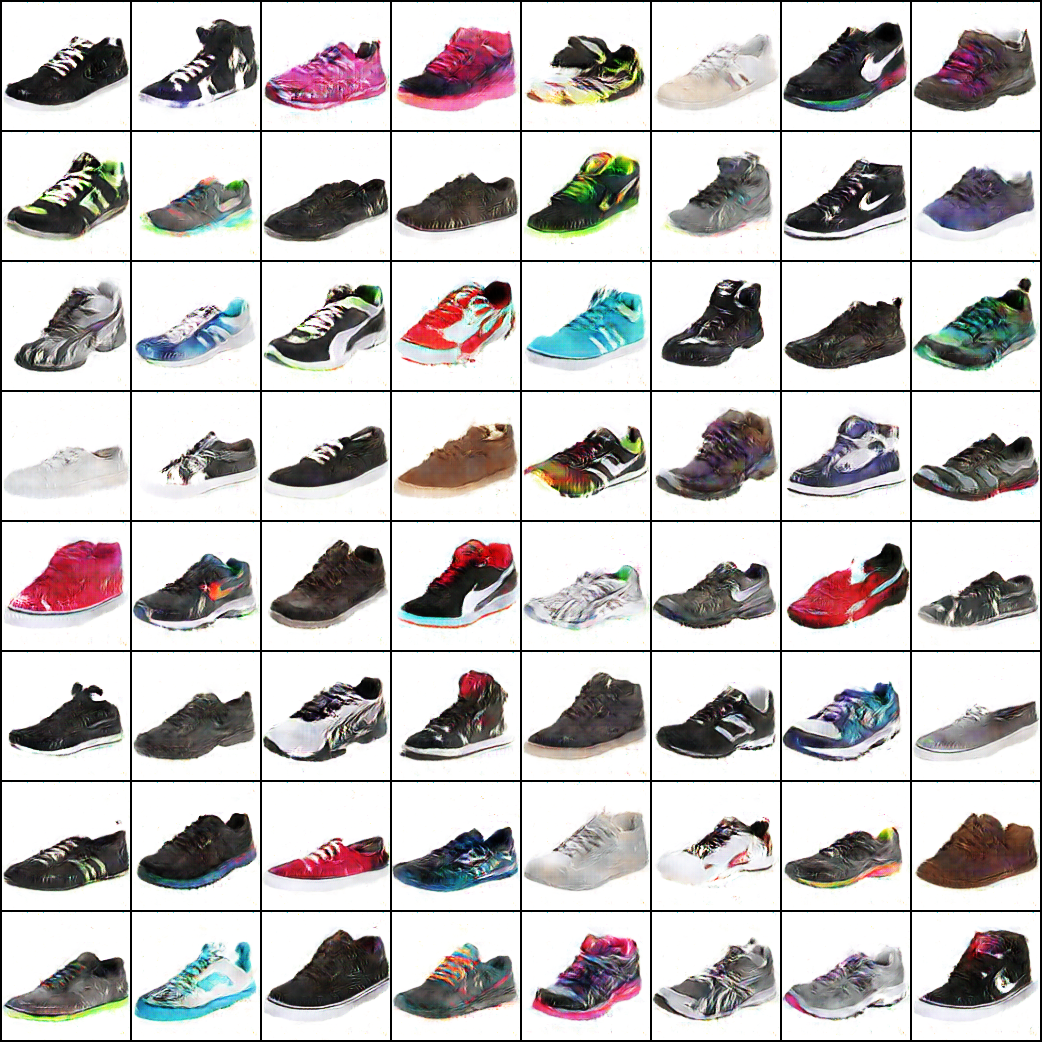

In [37]:
from torchvision.utils import save_image
from PIL import Image

# Show one fake image
fake_image = Image.open('./resultsDCGAN3_Scaled/images/fake_sample_epoch_49.png')
fake_image

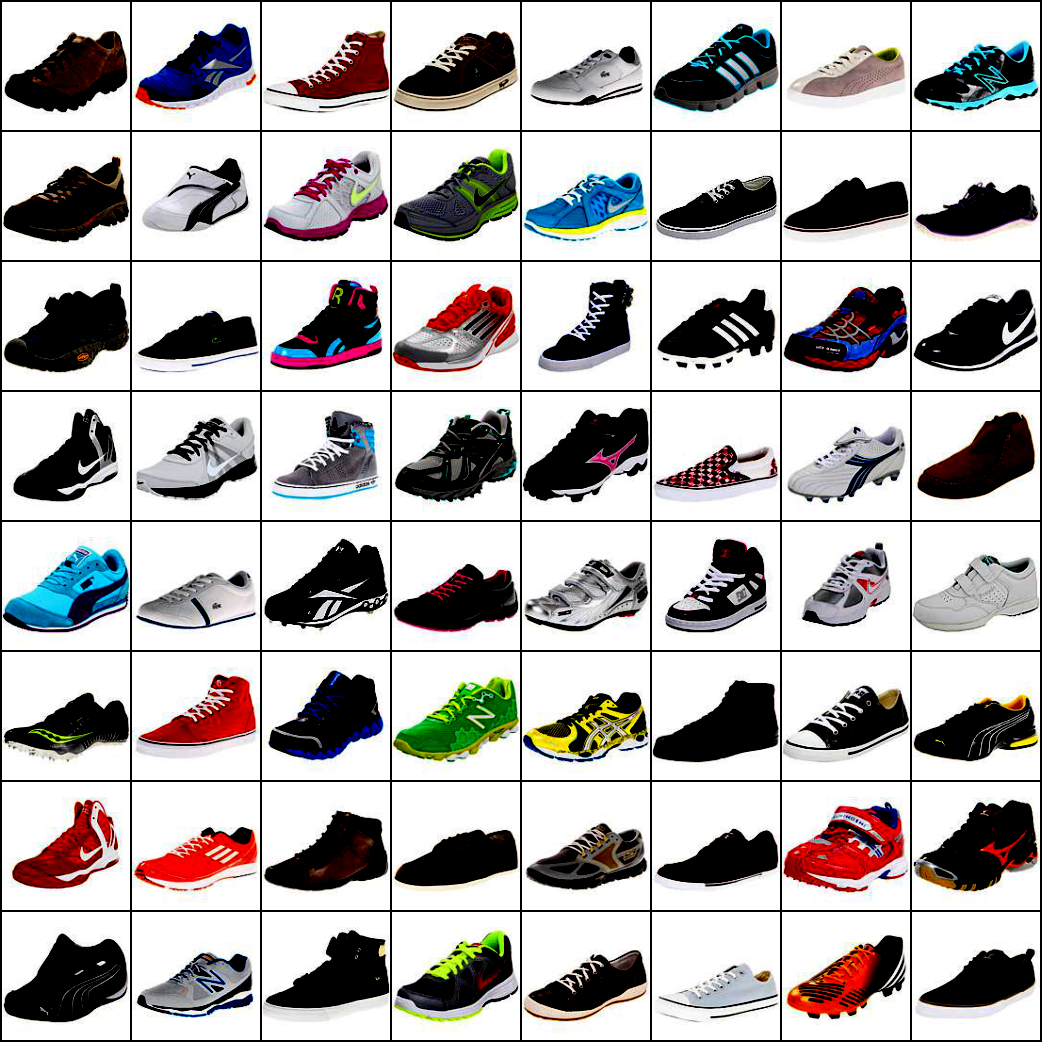

In [38]:
# Save one real image in image folder
sample, _ = iter(dataloader).next()
save_image(sample, os.path.join(args.image_results, "real_sample.png"))

# Show one real image
real_image = Image.open('./resultsDCGAN3_Scaled/images/real_sample.png')
real_image

## <font color="#337da4">Save Losses</font>

In [39]:
# Save in loss folder
result_losses.save_to_disk()

## <font color="#337da4">Save weights</font>

In [19]:
# The first (recommended) save only the model parameters, not the entire model

torch.save(netG.state_dict(), r'./resultsDCGAN3_Scaled/modelG.pth')

## <font color="#337da4">Generate Fake Image</font>

In [20]:
# The first (recommended) loads only the model parameters, not the entire model

netG.load_state_dict(torch.load(r'/home/catherinele/Documents/TRAVAIL/COMPUTER_SCIENCE/NEW/PROJET7_DEVELOPPER_UNE_PREUVE_DE_CONCEPT/20200918_DCGAN/GAN/resultsDCGAN3_Scaled/modelG.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [21]:
def generate_save(model):
    z=torch.randn(args.batch_size, args.z_dim, 1, 1)
    if args.cuda:
        z = z.cuda()
        
    with torch.no_grad():
        # Generate image
        fake = model(Variable(z, volatile=True)) 
    
        # Save the  image
        save_image(fake.data.cpu(), os.path.join(r'/home/catherinele/Documents/TRAVAIL/COMPUTER_SCIENCE/NEW/PROJET7_DEVELOPPER_UNE_PREUVE_DE_CONCEPT/20200918_DCGAN/GAN/resultsDCGAN3_Scaled/images',"fake_sample1.png"), normalize=True)
        
fake_image = generate_save(netG)

/tmp/ipykernel_19426/3447160010.py:8: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  fake = model(Variable(z, volatile=True))


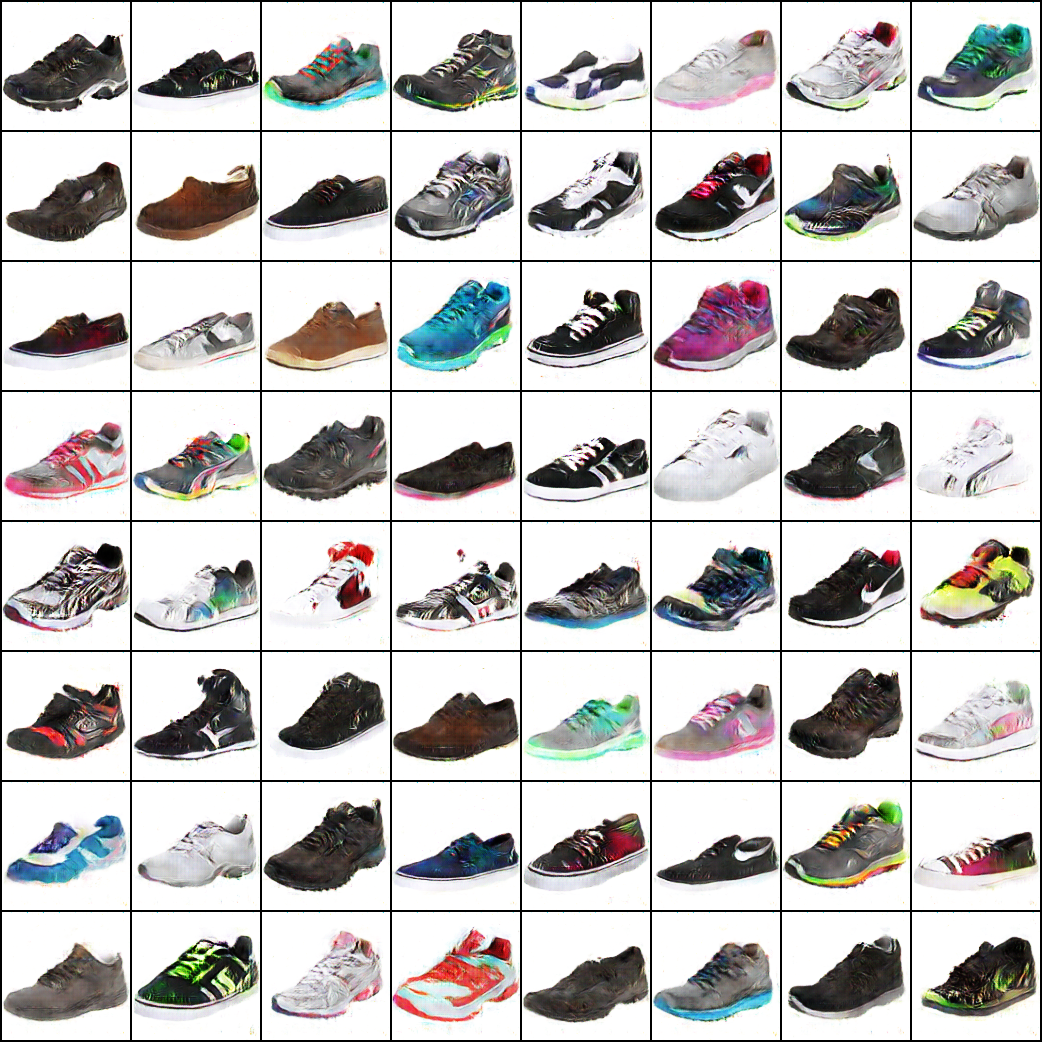

In [2]:
from torchvision.utils import save_image
from PIL import Image

fake_image = Image.open('/home/catherinele/Documents/TRAVAIL/COMPUTER_SCIENCE/NEW/PROJET7_DEVELOPPER_UNE_PREUVE_DE_CONCEPT/20200918_DCGAN/GAN/resultsDCGAN3_Scaled/images/fake_sample.png')
fake_image

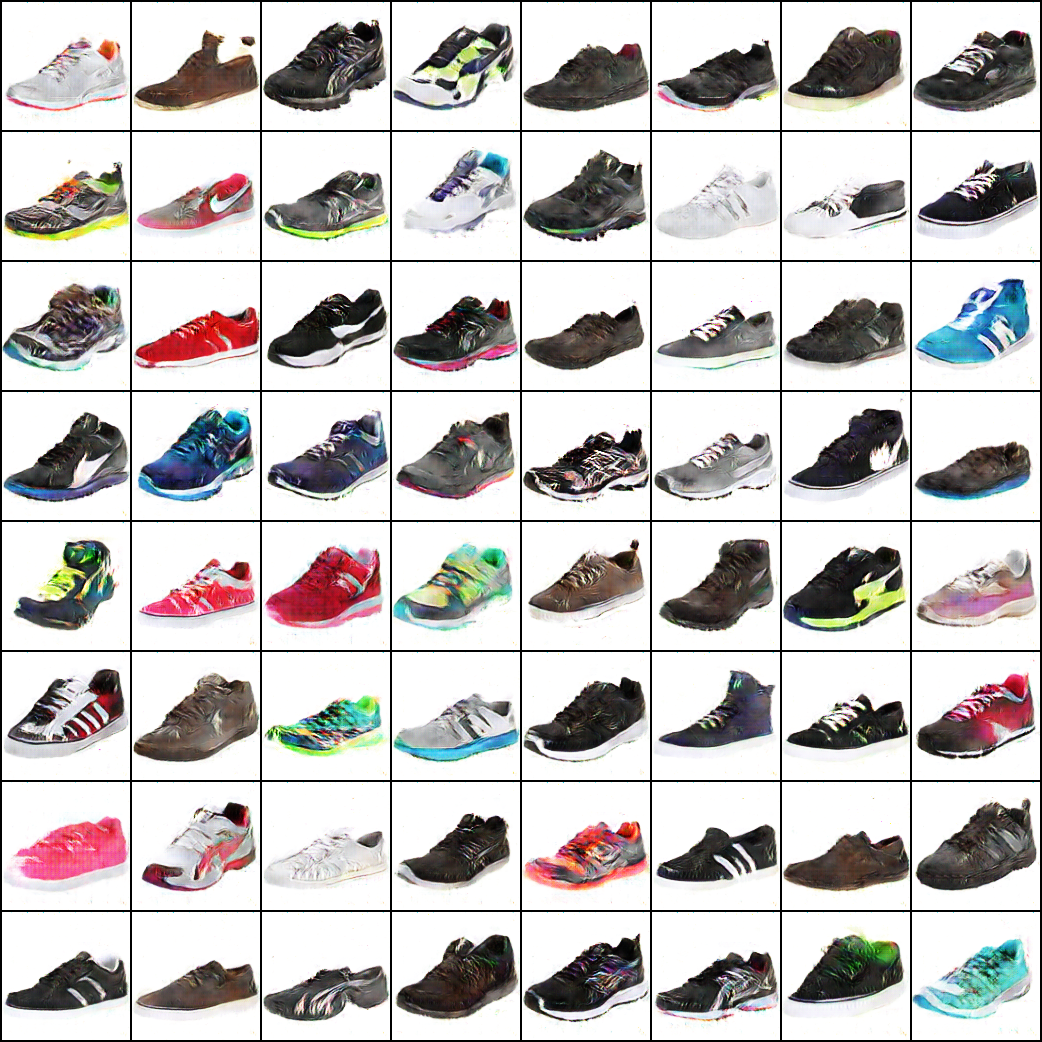

In [22]:
from torchvision.utils import save_image
from PIL import Image

fake_image = Image.open('/home/catherinele/Documents/TRAVAIL/COMPUTER_SCIENCE/NEW/PROJET7_DEVELOPPER_UNE_PREUVE_DE_CONCEPT/20200918_DCGAN/GAN/resultsDCGAN3_Scaled/images/fake_sample1.png')
fake_image

# <font color="#1d479b">StyleGAN2 - ADA</font>

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

import os
from os import listdir
from os.path import isfile, join
import os,shutil,math,scipy,cv2
import time

import sys
import pickle
from tqdm.notebook import tqdm
import glob

import IPython.display
from IPython.display import Image
import PIL.Image
from PIL import Image

import torch
from torch.utils.cpp_extension import CUDA_HOME
import dnnlib
import legacy

## <font color="#337da4">Clean Up your Images</font>

In [16]:
import os,shutil,math,scipy,cv2
from tqdm.notebook import tqdm


# Resize Images

data_dir = './Sneakers_and_Athletic_Shoes_split'

# List of arrays
X =[]

for img in tqdm(os.listdir(data_dir)):
        
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        
        #resize
        img = cv2.resize(img,(256,256))
        X.append(img)

  0%|          | 0/12856 [00:00<?, ?it/s]

In [15]:
! pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 76 kB 5.1 MB/s             


In [13]:
! pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 60.3 MB 12.9 MB/s            


Largeur : 256 px, hauteur : 256 px


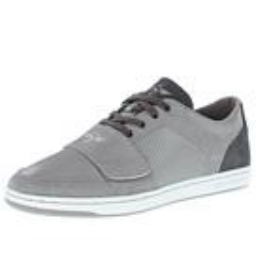

In [17]:
from PIL import Image


#check the image size

data = X[6]
img = Image.fromarray(data, 'RGB')
#img.save('my.png')
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))
img

In [19]:
import time

# Save scaled images 

start_time= time.time()
for i in range(len(X)):
    
    array = X[i]
    img = Image.fromarray(array, 'RGB')
    img.save('./images_rescaled/{}.png'.format(i))
    
execution_time = (time.time() - start_time)/60.0    
print("Done")

Done


In [20]:
execution_time

1.8494290113449097

In [21]:
from os import listdir
from os.path import isfile, join
import os
from PIL import Image
from tqdm.notebook import tqdm

IMAGE_PATH = './images_rescaled'

# List of images
files = [f for f in listdir(IMAGE_PATH) if isfile(join(IMAGE_PATH, f))]

# Verify again for the right format images

base_size = None

for file in tqdm(files):
    file2 = os.path.join(IMAGE_PATH,file)
    img = Image.open(file2)
    sz = img.size #256
    
    if base_size and sz != base_size:
        print(f"Inconsistant size: {file2}")
        
    elif img.mode != 'RGB':
        print(f"Inconsistant color format: {file2}")

    else:
        base_size = sz

  0%|          | 0/12856 [00:00<?, ?it/s]

## <font color="#337da4">Convert your Images</font>

In [22]:
# Images processed and move to dataset folder
! python3 dataset_tool.py --source ./images_rescaled --dest ./dataset2

100%|████████████████████████████████████| 12856/12856 [00:44<00:00, 287.15it/s]


## <font color="#337da4">Perform Initial Training</font>

### Environnement

In [2]:
import sys

# Executable root
sys.prefix

'/usr'

In [3]:
import sys

# Initial Path to Python
print(sys.executable)

/usr/bin/python3


In [4]:
import torch

# Initial Local Cuda 
torch.cuda.is_available()


True

In [5]:
'''Prints a/b/c for me, showing that torch has correctly set the CUDA_HOME '''

# if CUDA_HOME doesn't existed, out : a/b/c

# env variable to the value assigned.
! CUDA_HOME = a/b/c python3 -c "from torch.utils.cpp_extension import CUDA_HOME; print(CUDA_HOME)"

/bin/bash: line 1: CUDA_HOME: command not found


In [6]:
from torch.utils.cpp_extension import CUDA_HOME

print(CUDA_HOME) #OK

/usr/local/cuda


In [30]:
! pip install click

Defaulting to user installation because normal site-packages is not writeable


In [31]:
! pip install requests

Defaulting to user installation because normal site-packages is not writeable


In [33]:
! pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [34]:
! pip install pyspng

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 195 kB 8.0 MB/s            


In [29]:
!pip install ninja

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 108 kB 9.0 MB/s            


In [35]:
! pip install imageio-ffmpeg==0.4.3

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 26.9 MB 6.5 MB/s            


**CUDA toolkit 11.0 or later**
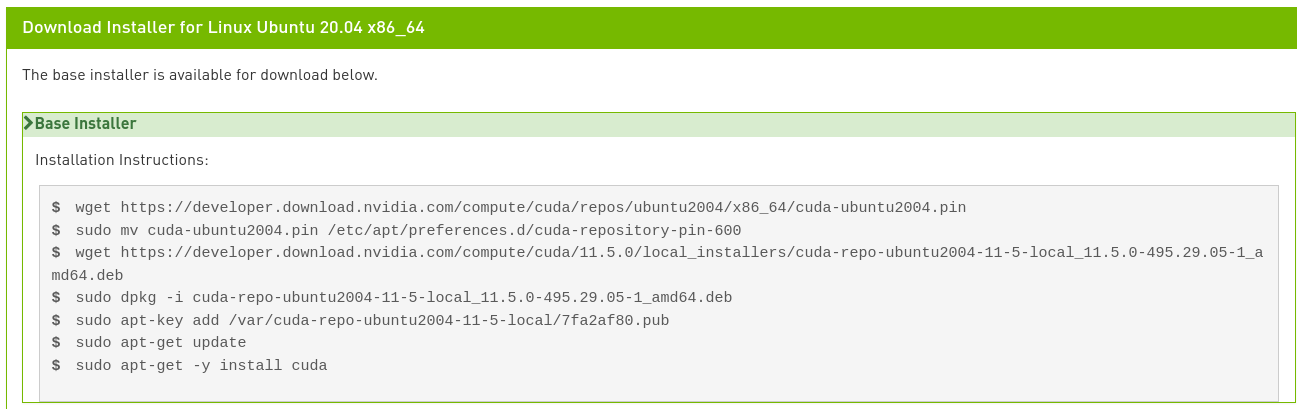


After installation Reboot. 

Source : https://developer.nvidia.com/cuda-downloads?target_os=Linux&target_arch=x86_64&Distribution=Ubuntu&target_version=20.04&target_type=deb_local

To check the installation:

https://varhowto.com/check-cuda-version/

In [ ]:
# My Pytorch Libraries Installed after CUDA toolkit 11.5 installation :

torch                             1.10.0
torchfile                         0.1.0
torchnet                          0.0.4
torchvision                       0.11.1

### Run Train

In [17]:
import os
import time

# Modify these to suit your needs
EXPERIMENTS = "./experiments"
DATA = "./dataset"
SNAP = 10

# Build the command and run it
start_time= time.time()

cmd = f"/usr/bin/python3 train.py --snap {SNAP} --outdir {EXPERIMENTS} --data {DATA}"
!{cmd}

execution_time = (time.time() - start_time)/60.0    
print("Done")


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 10,
  "network_snapshot_ticks": 10,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "./dataset",
    "use_labels": false,
    "max_size": 12856,
    "xflip": false,
    "resolution": 256
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 16384,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 16384,
    "channel_max": 512,
    "num_fp

tick 2     kimg 8.0      time 19m 37s      sec/tick 255.0   sec/kimg 63.76   maintenance 0.1    cpumem 5.14   gpumem 4.91   augment 0.011
tick 3     kimg 12.0     time 23m 50s      sec/tick 252.9   sec/kimg 63.22   maintenance 0.1    cpumem 5.14   gpumem 4.91   augment 0.015
tick 4     kimg 16.0     time 28m 04s      sec/tick 253.6   sec/kimg 63.39   maintenance 0.1    cpumem 5.14   gpumem 4.91   augment 0.019
tick 5     kimg 20.0     time 32m 20s      sec/tick 256.3   sec/kimg 64.06   maintenance 0.1    cpumem 5.14   gpumem 4.91   augment 0.025
tick 6     kimg 24.0     time 36m 40s      sec/tick 259.9   sec/kimg 64.97   maintenance 0.1    cpumem 5.14   gpumem 4.91   augment 0.031
tick 7     kimg 28.0     time 40m 58s      sec/tick 257.7   sec/kimg 64.42   maintenance 0.1    cpumem 5.14   gpumem 4.91   augment 0.037
tick 8     kimg 32.0     time 45m 17s      sec/tick 258.6   sec/kimg 64.65   maintenance 0.1    cpumem 5.14   gpumem 4.91   augment 0.040
tick 9     kimg 36.0     time 49m 

tick 53    kimg 212.0    time 4h 47m 06s   sec/tick 263.4   sec/kimg 65.85   maintenance 0.1    cpumem 5.16   gpumem 4.91   augment 0.148
tick 54    kimg 216.0    time 4h 51m 25s   sec/tick 259.5   sec/kimg 64.88   maintenance 0.1    cpumem 5.16   gpumem 4.91   augment 0.149
tick 55    kimg 220.0    time 4h 55m 55s   sec/tick 269.6   sec/kimg 67.41   maintenance 0.1    cpumem 5.16   gpumem 4.91   augment 0.151
tick 56    kimg 224.0    time 5h 00m 22s   sec/tick 267.1   sec/kimg 66.77   maintenance 0.2    cpumem 5.16   gpumem 4.93   augment 0.153
tick 57    kimg 228.0    time 5h 04m 45s   sec/tick 263.0   sec/kimg 65.76   maintenance 0.2    cpumem 5.16   gpumem 4.91   augment 0.154
tick 58    kimg 232.0    time 5h 09m 11s   sec/tick 265.4   sec/kimg 66.35   maintenance 0.1    cpumem 5.16   gpumem 4.93   augment 0.156
tick 59    kimg 236.0    time 5h 13m 28s   sec/tick 256.9   sec/kimg 64.22   maintenance 0.1    cpumem 5.16   gpumem 4.91   augment 0.156
tick 60    kimg 240.0    time 5h 1

tick 104   kimg 416.0    time 9h 12m 42s   sec/tick 255.2   sec/kimg 63.79   maintenance 0.1    cpumem 5.16   gpumem 4.95   augment 0.264
tick 105   kimg 420.0    time 9h 16m 57s   sec/tick 254.4   sec/kimg 63.60   maintenance 0.1    cpumem 5.16   gpumem 4.97   augment 0.268
tick 106   kimg 424.0    time 9h 21m 12s   sec/tick 255.2   sec/kimg 63.80   maintenance 0.1    cpumem 5.16   gpumem 4.92   augment 0.270
tick 107   kimg 428.0    time 9h 25m 26s   sec/tick 254.3   sec/kimg 63.58   maintenance 0.1    cpumem 5.16   gpumem 4.93   augment 0.274
tick 108   kimg 432.0    time 9h 29m 42s   sec/tick 255.1   sec/kimg 63.79   maintenance 0.1    cpumem 5.16   gpumem 4.94   augment 0.276
tick 109   kimg 436.0    time 9h 33m 57s   sec/tick 254.8   sec/kimg 63.71   maintenance 0.1    cpumem 5.16   gpumem 4.95   augment 0.278
tick 110   kimg 440.0    time 9h 38m 12s   sec/tick 254.9   sec/kimg 63.71   maintenance 0.1    cpumem 5.16   gpumem 4.95   augment 0.281
Evaluating metrics...
{"results": 

tick 155   kimg 620.0    time 13h 35m 45s  sec/tick 254.4   sec/kimg 63.60   maintenance 0.1    cpumem 5.41   gpumem 4.94   augment 0.278
tick 156   kimg 624.0    time 13h 40m 01s  sec/tick 255.3   sec/kimg 63.82   maintenance 0.1    cpumem 5.41   gpumem 4.95   augment 0.278
tick 157   kimg 628.0    time 13h 44m 16s  sec/tick 255.1   sec/kimg 63.77   maintenance 0.1    cpumem 5.41   gpumem 4.97   augment 0.278
tick 158   kimg 632.0    time 13h 48m 31s  sec/tick 255.0   sec/kimg 63.75   maintenance 0.1    cpumem 5.41   gpumem 4.93   augment 0.280
tick 159   kimg 636.0    time 13h 52m 46s  sec/tick 255.0   sec/kimg 63.76   maintenance 0.1    cpumem 5.41   gpumem 4.92   augment 0.280
tick 160   kimg 640.0    time 13h 57m 02s  sec/tick 255.4   sec/kimg 63.84   maintenance 0.1    cpumem 5.41   gpumem 5.02   augment 0.278
Evaluating metrics...
{"results": {"fid50k_full": 20.57570443932306}, "metric": "fid50k_full", "total_time": 533.5367918014526, "total_time_str": "8m 54s", "num_gpus": 1, "

tick 206   kimg 824.0    time 17h 58m 38s  sec/tick 254.9   sec/kimg 63.73   maintenance 0.1    cpumem 5.44   gpumem 4.97   augment 0.281
tick 207   kimg 828.0    time 18h 02m 53s  sec/tick 255.0   sec/kimg 63.76   maintenance 0.1    cpumem 5.44   gpumem 4.96   augment 0.282
tick 208   kimg 832.0    time 18h 07m 08s  sec/tick 255.4   sec/kimg 63.85   maintenance 0.1    cpumem 5.44   gpumem 4.95   augment 0.282
tick 209   kimg 836.0    time 18h 11m 23s  sec/tick 254.6   sec/kimg 63.65   maintenance 0.1    cpumem 5.44   gpumem 4.97   augment 0.282
tick 210   kimg 840.0    time 18h 15m 39s  sec/tick 255.4   sec/kimg 63.84   maintenance 0.1    cpumem 5.44   gpumem 4.93   augment 0.282
Evaluating metrics...
{"results": {"fid50k_full": 15.108660264919923}, "metric": "fid50k_full", "total_time": 539.5005955696106, "total_time_str": "9m 00s", "num_gpus": 1, "snapshot_pkl": "network-snapshot-000840.pkl", "timestamp": 1636442828.9700534}
tick 211   kimg 844.0    time 18h 29m 02s  sec/tick 254.8 

tick 257   kimg 1028.0   time 22h 24m 10s  sec/tick 266.4   sec/kimg 66.59   maintenance 0.2    cpumem 5.40   gpumem 4.94   augment 0.301
tick 258   kimg 1032.0   time 22h 28m 34s  sec/tick 264.5   sec/kimg 66.11   maintenance 0.1    cpumem 5.40   gpumem 4.95   augment 0.301
tick 259   kimg 1036.0   time 22h 33m 02s  sec/tick 267.8   sec/kimg 66.95   maintenance 0.1    cpumem 5.40   gpumem 4.94   augment 0.301
tick 260   kimg 1040.0   time 22h 37m 32s  sec/tick 269.7   sec/kimg 67.43   maintenance 0.2    cpumem 5.40   gpumem 5.03   augment 0.300
Evaluating metrics...
{"results": {"fid50k_full": 14.459097169593788}, "metric": "fid50k_full", "total_time": 570.8846659660339, "total_time_str": "9m 31s", "num_gpus": 1, "snapshot_pkl": "network-snapshot-001040.pkl", "timestamp": 1636458573.727257}
tick 261   kimg 1044.0   time 22h 51m 42s  sec/tick 269.6   sec/kimg 67.39   maintenance 580.2  cpumem 5.42   gpumem 4.96   augment 0.301
tick 262   kimg 1048.0   time 22h 56m 09s  sec/tick 267.3  

### Resume the training and Transfert Learning

In [18]:
import os

# Modify these to suit your needs
EXPERIMENTS = "./experiments/"
NETWORK = "network-snapshot-001080.pkl"
RESUME = os.path.join(EXPERIMENTS, "00001-dataset-auto1/", NETWORK)
DATA = "./dataset"
SNAP = 10

#start_time= time.time()

# Re-train from the last weight .pkl file and Resume Training
cmd = f"python3 train.py --snap {SNAP} --resume {RESUME} --outdir {EXPERIMENTS} --data {DATA}"
!{cmd}

#execution_time = (time.time() - start_time)/60.0 


Training options:
{
  "num_gpus": 1,
  "image_snapshot_ticks": 10,
  "network_snapshot_ticks": 10,
  "metrics": [
    "fid50k_full"
  ],
  "random_seed": 0,
  "training_set_kwargs": {
    "class_name": "training.dataset.ImageFolderDataset",
    "path": "./dataset",
    "use_labels": false,
    "max_size": 12856,
    "xflip": false,
    "resolution": 256
  },
  "data_loader_kwargs": {
    "pin_memory": true,
    "num_workers": 3,
    "prefetch_factor": 2
  },
  "G_kwargs": {
    "class_name": "training.networks.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "synthesis_kwargs": {
      "channel_base": 16384,
      "channel_max": 512,
      "num_fp16_res": 4,
      "conv_clamp": 256
    }
  },
  "D_kwargs": {
    "class_name": "training.networks.Discriminator",
    "block_kwargs": {},
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 16384,
    "channel_max": 512,
    "num_fp

tick 1     kimg 4.0      time 13m 47s      sec/tick 247.1   sec/kimg 61.76   maintenance 552.9  cpumem 3.89   gpumem 4.91   augment 0.028
tick 2     kimg 8.0      time 17m 54s      sec/tick 246.9   sec/kimg 61.74   maintenance 0.1    cpumem 3.89   gpumem 4.99   augment 0.054
tick 3     kimg 12.0     time 22m 00s      sec/tick 245.9   sec/kimg 61.48   maintenance 0.1    cpumem 3.89   gpumem 4.91   augment 0.076
tick 4     kimg 16.0     time 26m 05s      sec/tick 244.9   sec/kimg 61.22   maintenance 0.1    cpumem 3.89   gpumem 4.97   augment 0.102
tick 5     kimg 20.0     time 30m 11s      sec/tick 245.7   sec/kimg 61.42   maintenance 0.1    cpumem 3.89   gpumem 4.95   augment 0.129
tick 6     kimg 24.0     time 34m 18s      sec/tick 246.4   sec/kimg 61.61   maintenance 0.1    cpumem 3.89   gpumem 4.98   augment 0.150
tick 7     kimg 28.0     time 38m 23s      sec/tick 245.2   sec/kimg 61.30   maintenance 0.1    cpumem 3.89   gpumem 4.97   augment 0.164
tick 8     kimg 32.0     time 42m 

In [8]:
! pip install psutil

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 293 kB 9.5 MB/s            


In [13]:
# RuntimeError: derivative for aten::grid_sampler_2d_backward is not implemented
# Have to downgrade the torch version
! pip3 install torch==1.7.1

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import torch

# clearing the occupied cuda memory
# https://stackoverflow.com/questions/59129812/how-to-avoid-cuda-out-of-memory-in-pytorch
torch.cuda.empty_cache()

### Quality metrics

In [3]:
# Precision and recall[3] againt the full dataset

! python3 calc_metrics.py --metrics=pr50k3_full \
    --network=./experiments/00006-dataset-auto1-resumecustom/network-snapshot-000040.pkl

Loading network from "./experiments/00006-dataset-auto1-resumecustom/network-snapshot-000040.pkl"...
Dataset options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "./dataset",
  "use_labels": false,
  "max_size": 12856,
  "xflip": false,
  "resolution": 256
}
Launching processes...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.

Generator             Parameters  Buffers  Output shape        Datatype
---                   ---         ---      ---                 ---     
mapping.fc0           262656      -        [1, 512]            float32 
mapping.fc1           262656      -        [1, 512]            float32 
mapping               -           512      [1, 14, 512]        float32 
synthesis.b4.conv1    2622465     32       [1, 512, 4, 4]      float32 
synthesis.b4.torgb    264195      -        [1, 3, 4, 4]        float32 
synthesis.b4:0        8192        16       [1, 512, 4, 4]      float32 
synthesis.b

In [4]:
! python3 calc_metrics.py --metrics=fid50k_full --data=./dataset --mirror=1 \
    --network=./experiments/00006-dataset-auto1-resumecustom/network-snapshot-000040.pkl

Loading network from "./experiments/00006-dataset-auto1-resumecustom/network-snapshot-000040.pkl"...
Dataset options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "./dataset",
  "resolution": 256,
  "use_labels": false,
  "xflip": true
}
Launching processes...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.

Generator             Parameters  Buffers  Output shape        Datatype
---                   ---         ---      ---                 ---     
mapping.fc0           262656      -        [1, 512]            float32 
mapping.fc1           262656      -        [1, 512]            float32 
mapping               -           512      [1, 14, 512]        float32 
synthesis.b4.conv1    2622465     32       [1, 512, 4, 4]      float32 
synthesis.b4.torgb    264195      -        [1, 3, 4, 4]        float32 
synthesis.b4:0        8192        16       [1, 512, 4, 4]      float32 
synthesis.b4:1        -          

In [35]:
import numpy as np
import pandas as pd

fid50k_full =[318.1086094062392,300.8547646525889,288.17550769885804,222.18992983248634,
    133.4351897162514,150.50177456188118,74.95244304089667,51.093758915180466,
    38.170133179500354,31.5245414110399,36.29032513187033,29.928222718510803,
    32.280960273542675,28.394160960914917,24.83661329760716,21.713633844425196,
    20.57570443932306,19.328816596283612,17.745865064630202,16.304248072990458,
    17.223363497487178,15.108660264919923, 15.260696917254359, 14.331048511637917,
    14.837258830318714,14.593970384056448,  14.459097169593788, 13.259584320578943]  
ticks = np.arange(0,280,10)

result = pd.DataFrame(fid50k_full)
result['ticks'] = ticks
result = result.rename(columns={0: "fid50k_full"})
result = result.set_index('ticks')
print(result.shape)
result.head()

(28, 1)


fid50k_full
ticks             
0       318.108609
10      300.854765
20      288.175508
30      222.189930
40      133.435190

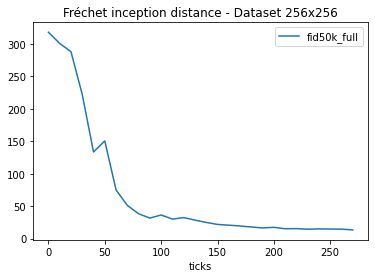

In [43]:
import matplotlib.pyplot as plt

result.plot(kind="line")
plt.title("Fréchet inception distance - Dataset 256x256")
plt.show()


## <font color="#337da4">Generate Fake Images</font>

In [19]:
!python3 generate.py \
    --network=./experiments/00006-dataset-auto1-resumecustom/network-snapshot-000040.pkl \
  --outdir=./experiments/results1 --seeds=6600-6625

Loading networks from "./experiments/00006-dataset-auto1-resumecustom/network-snapshot-000040.pkl"...
Generating image for seed 6600 (0/26) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 6601 (1/26) ...
Generating image for seed 6602 (2/26) ...
Generating image for seed 6603 (3/26) ...
Generating image for seed 6604 (4/26) ...
Generating image for seed 6605 (5/26) ...
Generating image for seed 6606 (6/26) ...
Generating image for seed 6607 (7/26) ...
Generating image for seed 6608 (8/26) ...
Generating image for seed 6609 (9/26) ...
Generating image for seed 6610 (10/26) ...
Generating image for seed 6611 (11/26) ...
Generating image for seed 6612 (12/26) ...
Generating image for seed 6613 (13/26) ...
Generating image for seed 6614 (14/26) ...
Generating image for seed 6615 (15/26) ...
Generating image for seed 6616 (16/26) ...
Generating image for seed 6617 (17/26) ...
Generating image for seed 6

In [21]:
!ls ./experiments/results1

seed6600.png  seed6606.png  seed6612.png  seed6618.png	seed6624.png
seed6601.png  seed6607.png  seed6613.png  seed6619.png	seed6625.png
seed6602.png  seed6608.png  seed6614.png  seed6620.png
seed6603.png  seed6609.png  seed6615.png  seed6621.png
seed6604.png  seed6610.png  seed6616.png  seed6622.png
seed6605.png  seed6611.png  seed6617.png  seed6623.png


In [25]:
from PIL import Image
import glob

# List of images
image_list = []
for filename in glob.glob('./experiments/results1/*.png'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)
image_list

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FE75B4C7B80>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FE7614A1D60>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FE75B448400>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FE7F4637F40>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FE7614A1550>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FE7614A1DF0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FE7614A10D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FE7614A1220>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FE7614A1430>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FE7614A16A0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FE7614A1940>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FE7614A13A0>,
 <PIL.PngImagePl

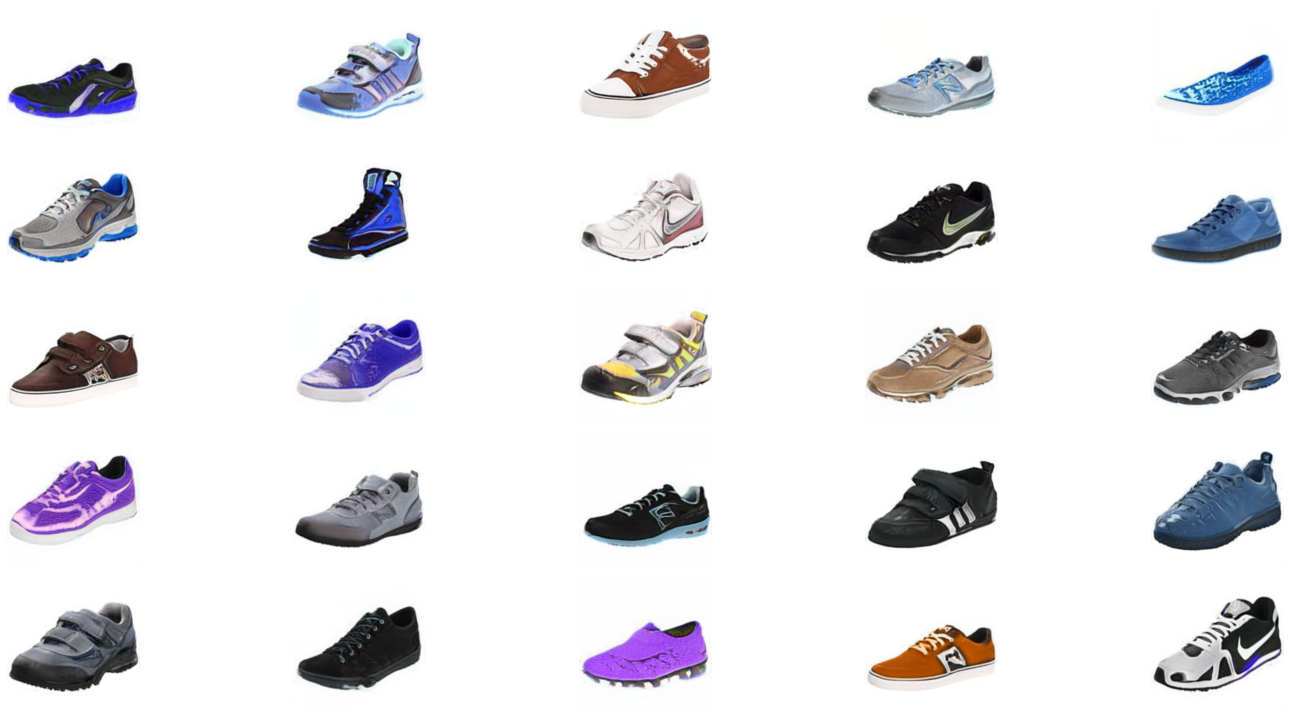

In [26]:
from matplotlib.pyplot import figure


fig =figure(figsize=(20,20))

for i, file in enumerate(image_list[0:25]):
    axs = fig.add_subplot(10, 5, i+1)
    axs.set_aspect('equal')
    
    plt.imshow(image_list[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## <font color="#337da4">Run StyleGAN2 From Python Code</font>


The code below is based on code from NVIDIA. This actually generates your images.

In [22]:
import sys
sys.path.insert(0, "/content/stylegan2-ada-pytorch")
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt
import IPython.display
import torch
import dnnlib
import legacy

def seed2vec(G, seed):
    return np.random.RandomState(seed).randn(1, G.z_dim)

def display_image(image):
    plt.axis('off')
    plt.imshow(image)
    plt.show()

def generate_image(G, z, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + G.input_shapes[1][1:])
    images = G.run(z, label, **G_kwargs) # [minibatch, height, width, channel]
    return images[0]

def get_label(G, device, class_idx):
    label = torch.zeros([1, G.c_dim], device=device)
    if G.c_dim != 0:
        if class_idx is None:
            ctx.fail('Must specify class label with --class when using a conditional network')
        label[:, class_idx] = 1
    else:
        if class_idx is not None:
            print ('warn: --class=lbl ignored when running on an unconditional network')
    return label

def generate_image(device, G, z, truncation_psi=1.0, noise_mode='const', class_idx=None):
    z = torch.from_numpy(z).to(device)
    label = get_label(G, device, class_idx)
    img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode)
    img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    #PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB').save(f'{outdir}/seed{seed:04d}.png')
    return PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')



In [23]:
# Load the G Network

PATH = "./experiments/00006-dataset-auto1-resumecustom/network-snapshot-000040.pkl"

print(f'Loading networks from "{PATH}"...')

device = torch.device('cuda')

with dnnlib.util.open_url(PATH) as f:
    
    G = legacy.load_network_pkl(f)['G_ema'].to(device)
    
    print("Done")# type: ignore

Loading networks from "./experiments/00006-dataset-auto1-resumecustom/network-snapshot-000040.pkl"...
Done


Seed 1000
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


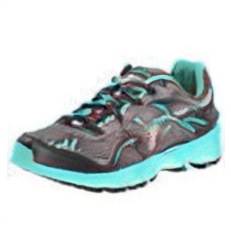

Seed 1001


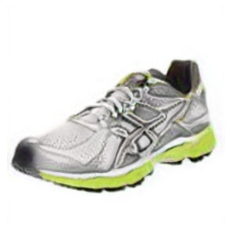

Seed 1002


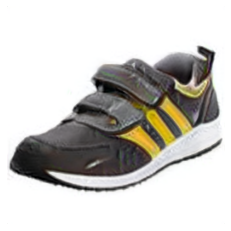

In [24]:
# Choose your own starting and ending seed.

SEED_FROM = 1000
SEED_TO = 1003

# Display the images for the seeds.

for i in range(SEED_FROM, SEED_TO):
    
    print(f"Seed {i}")
    
    z = seed2vec(G, i)
    
    img = generate_image(device, G, z)
    
    display_image(img)

## <font color="#337da4">Examining the Latent Vector: make a video</font>

In [27]:
def expand_seed(seeds, vector_size):
    result = []

    for seed in seeds:
        rnd = np.random.RandomState(seed)
        result.append( rnd.randn(1, vector_size) ) 
    return result


# Load the G Network

PATH = "./experiments/00006-dataset-auto1-resumecustom/network-snapshot-000040.pkl"

print(f'Loading networks from "{PATH}"...')

device = torch.device('cuda')

with dnnlib.util.open_url(PATH) as f:
    
    G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

vector_size = G.z_dim
print("vector size: ", vector_size) #range(8192,8300)


Loading networks from "./experiments/00006-dataset-auto1-resumecustom/network-snapshot-000040.pkl"...
vector size:  512


In [28]:
seeds = expand_seed( [8192+1,8192+9], vector_size)
#generate_images(Gs, seeds,truncation_psi=0.5)

print(seeds[0].shape)

(1, 512)


In [29]:
# Choose your seeds to morph through and the number of steps to take to get to each.

SEEDS = [1000,1003,1001]
STEPS = 100

# Remove any prior results
!rm ./experiments/results/* 

from tqdm.notebook import tqdm

#os.makedirs("./experiments/results/", exist_ok=True)

# Generate the images for the video.
idx = 0
for i in range(len(SEEDS)-1):
    v1 = seed2vec(G, SEEDS[i])
    v2 = seed2vec(G, SEEDS[i+1])

    diff = v2 - v1
    step = diff / STEPS
    current = v1.copy()

    for j in tqdm(range(STEPS), desc=f"Seed {SEEDS[i]}"):
        current = current + step
        img = generate_image(device, G, current)
        img.save(f'./experiments/results/frame-{idx}.png')
        idx+=1

# Link the images into a video.
!ffmpeg -r 30 -i ./experiments/results/frame-%d.png -vcodec mpeg4 -y movie.mp4

Seed 1000:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 1003:   0%|          | 0/100 [00:00<?, ?it/s]

/bin/bash: line 1: ffmpeg: command not found


In [30]:
# Link the images into a video.

# To install ffmped :
#https://askubuntu.com/questions/699502/ffmpeg-command-not-found
#https://www.techiediaries.com/ubuntu/add-remove-ppa-ubuntu-20-04/

! ffmpeg -r 30 -i ./experiments/results/frame-%d.png -vcodec mpeg4 -y movie.mp4

ffmpeg version 4.3.2-0+deb11u1ubuntu1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10 (Ubuntu 10.2.1-20ubuntu1)
  configuration: --prefix=/usr --extra-version=0+deb11u1ubuntu1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolam

In [2]:
from ipywidgets import Video, Image
from IPython.display import display
import numpy as np
import cv2
import base64

In [4]:
#video = Video.from_file("movie.mp4")
#video #https://towardsdatascience.com/video-streaming-in-the-jupyter-notebook-635bc5809e85

# <font color="#1d479b">Sources</font>

**Sources**

Implémentation Code DCGAN:

https://github.com/hminle/shoe-design-using-generative-adversarial-networks

https://awesomeopensource.com/project/hminle/shoe-design-using-generative-adversarial-networks?categoryPage=18

Paramétrage Hyper paramètres DCGAN:

https://jonathan-hui.medium.com/gan-dcgan-deep-convolutional-generative-adversarial-networks-df855c438f

Implémentation Code StyleGAN2 ADA:

https://github.com/jeffheaton/present/blob/master/youtube/gan/colab_gan_train.ipynb

https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_07_3_style_gan.ipynb
    
https://github.com/NVlabs/stylegan2-ada-pytorch

Schema d'installation python: 

https://docs.python.org/fr/3/install/index.html

GAN Optimization:

https://neptune.ai/blog/gan-loss-functions
    